## imports

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib

## import data

In [3]:
dataset = pd.read_csv("dataset.csv")

In [4]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
dataset.shape

(2290, 6)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
dataset.duplicated().sum()

np.int64(0)

In [10]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
# date formating

dataset['Date'] = pd.to_datetime(dataset['Date'], format="%m/%d/%Y")
dataset['Day'] = dataset['Date'].apply(lambda x: x.strftime("%a"))
dataset['Month'] = dataset['Date'].apply(lambda x: x.strftime("%b"))
dataset['Year'] = dataset['Date'].dt.year

dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,Day,Month,Year
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,Wed,Jan,2008
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,Thu,Jan,2008
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492,Fri,Jan,2008
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299,Mon,Jan,2008
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099,Tue,Jan,2008


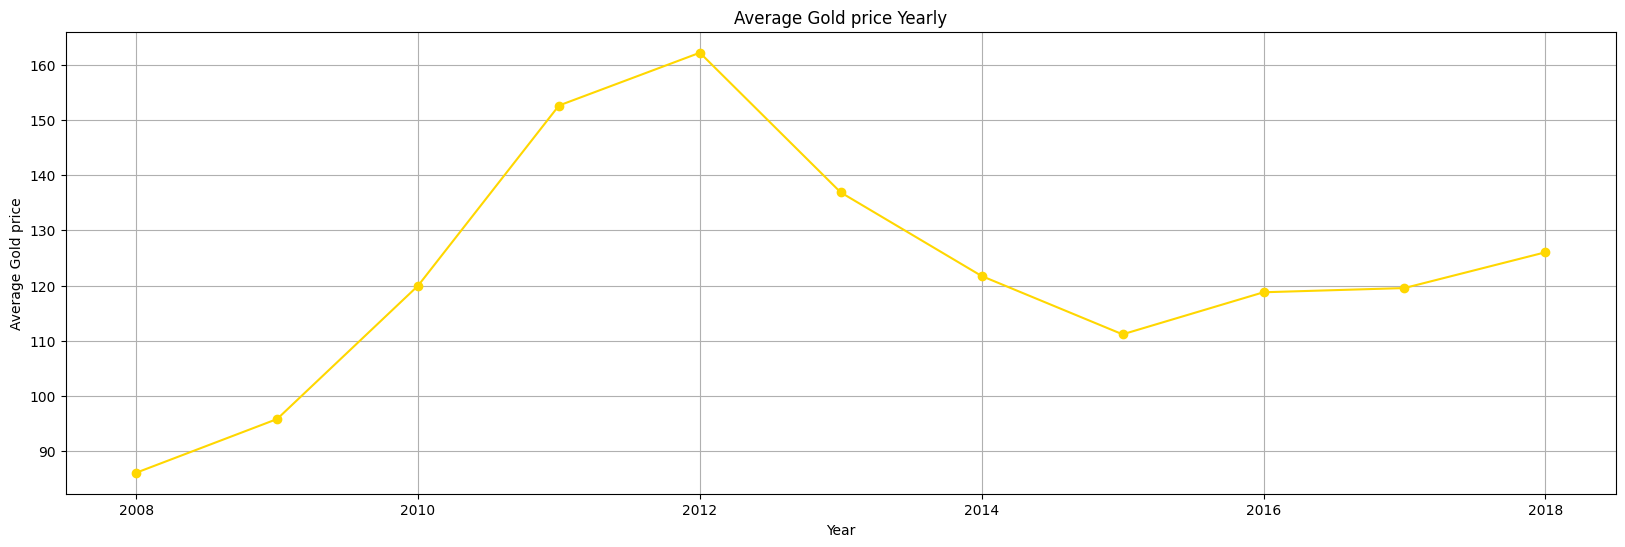

In [12]:
# avarage gold price historically

mean_gold_price = dataset.groupby("Year")['GLD'].mean()

plt.figure(figsize=(20, 6))
plt.plot(mean_gold_price.index, mean_gold_price.values, color="gold", marker="o")
plt.xlabel("Year")
plt.ylabel("Average Gold price")
plt.title("Average Gold price Yearly")
plt.grid(True)
plt.show()

In [13]:
# convert day and month into number

day_map = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}

dataset['Day'] = dataset['Day'].map(day_map)

month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

dataset['Month'] = dataset['Month'].map(month_map)
dataset

,Date,SPX,GLD,USO,SLV,EUR/USD,Day,Month,Year
0,2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692,3,1,2008
1,2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491,4,1,2008
2,2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492,5,1,2008
3,2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299,1,1,2008
4,2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099,2,1,2008
...,...,...,...,...,...,...,...,...,...
2285,2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789,2,5,2018
2286,2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722,3,5,2018
2287,2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753,4,5,2018
2288,2018-05-14,2730.129883,124.489998,14.380000,15.5600,1.193118,1,5,2018


<Axes: >

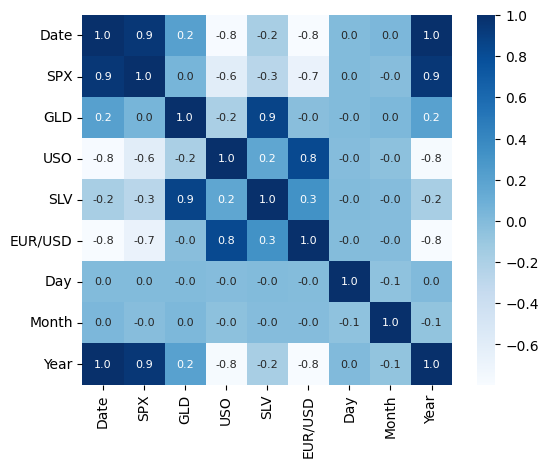

In [14]:
correlation = dataset.corr()

sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

C:\Users\shaki\AppData\Local\Temp\ipykernel_14732\2350189101.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


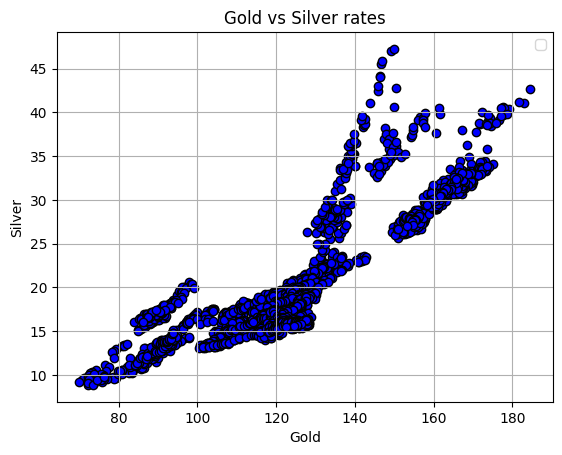

In [15]:
# analyze Gold and Silver rates

plt.scatter(dataset['GLD'], dataset['SLV'], color='Blue', edgecolors='black')
plt.xlabel('Gold')
plt.ylabel('Silver')
plt.title('Gold vs Silver rates')
plt.grid(True)
plt.legend()
plt.show()

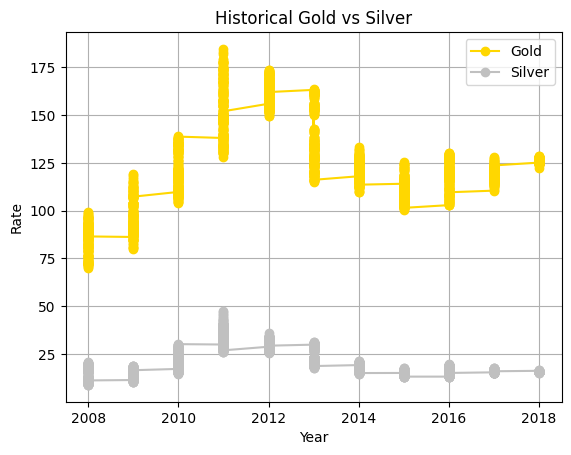

In [16]:
# Gold and Silver rate historically

plt.plot(dataset['Year'], dataset['GLD'], marker='o', color='gold', label='Gold')
plt.plot(dataset['Year'], dataset['SLV'], marker='o', color='silver', label='Silver')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Historical Gold vs Silver')
plt.grid(True)
plt.legend()
plt.show()

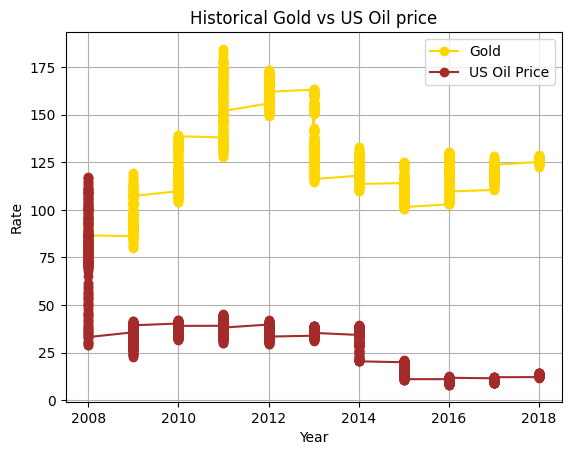

In [17]:
# Gold and USO rate historically

plt.plot(dataset['Year'], dataset['GLD'], marker='o', color='gold', label='Gold')
plt.plot(dataset['Year'], dataset['USO'], marker='o', color='brown', label='US Oil Price')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Historical Gold vs US Oil price')
plt.grid(True)
plt.legend()
plt.show()

## feature splitting

In [18]:
x = dataset.drop(['Date', 'GLD', 'Year'], axis=1)
y = dataset['GLD']

In [19]:
x

,SPX,USO,SLV,EUR/USD,Day,Month
0,1447.160034,78.470001,15.1800,1.471692,3,1
1,1447.160034,78.370003,15.2850,1.474491,4,1
2,1411.630005,77.309998,15.1670,1.475492,5,1
3,1416.180054,75.500000,15.0530,1.468299,1,1
4,1390.189941,76.059998,15.5900,1.557099,2,1
...,...,...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789,2,5
2286,2697.790039,14.370000,15.5300,1.184722,3,5
2287,2723.070068,14.410000,15.7400,1.191753,4,5
2288,2730.129883,14.380000,15.5600,1.193118,1,5


In [20]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

## Split train and test data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

## Apply Random forest regression model

In [22]:
model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
y_predict = model.predict(X_test)

model.score(X_test, y_test)

0.9924763714435937

## Visualization of predictions

C:\Users\shaki\AppData\Local\Temp\ipykernel_14732\4050904736.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


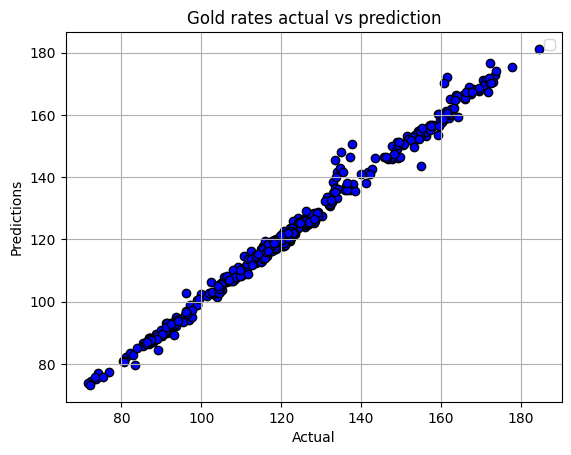

In [24]:
plt.scatter(y_test, y_predict, color='Blue', edgecolors='black')
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.title('Gold rates actual vs prediction')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
joblib.dump(model, "model.pkl")

['model.pkl']